# Table of Contents

# Introduction to Model/Approach

## Goal of this tutorial

The goal of this tutorial is to present the features of the European labor market in Python consistently and with commentary. From a programming side, the main objective was working with data. From an economic side, the main objective was implementing an economic model and using programming to demonstrate features otherwise more difficult to demonstrate.

This tutorial will focus mainly on the learnings from a programming perspective. However, this introduction will set up the background from an economic side to orientate the reader. There will be additional economic commentary throughout the sections.

## A simple model of the labor market

A simple model of the labor market that is used in this tutorial catagorizes three states a working-age person can be in:
1. Employed E
2. Unemployed U
3. Inactive or out of the labor force N

Using three states you can analysze labor market indicators:

* __Participation Rate__:  $$ \frac{E + U}{E + U + N}\label{eq1}\tag{1} $$

* **Employment Rate**: $$ \frac{E}{E + U + N}\label{eq2}\tag{2} $$

* **Unemployment Rate**: $$ \frac{U}{E + U}\label{eq3}\tag{3} $$

The flows of people from one state to another are called **transitions**. Transition rates are calculated from using data that shows the beginning and end value of people in states, and then is calculated from the change.

For example, UE transition rates represent the percentage of people unemployed at the beginning of the period that transition to being employed.

It can be used to approximate how likely it is for an unemployed person to find a job (Job finding probablity).

This will be elaborated upon further in the tutorial as it specific to certain sections.

# Data

## Eurostat Data

In order to compare the different dynamics of countries related to transition rates and unemployment rates, data needs to be collected systematically and in a reliable manner. All data used in this tutorial is extracted from Eurostat which is an adminitrative branch of the European Commission located in Luxembourg. Its responsability is to provide statistical information to the institutions of the European Union and to encourage the harmonisation of statistical methods in order to ease comparison between data. In this section, we will discuss how Eurostat gather data and the degree of relability of its operations. Eurostat publishes its statistical database online for free on its [website](https://ec.europa.eu/eurostat).

The data that will interest us in this tutorial are the one related to the **European Labor market**. The European Labor Force Survey is a survey conducted by Eurostat in order to find those data. The latter are obtained by interviewing a large sample of individuals directly. This data collection takes place over on a monthly, quarterly and annually basis. The European Labor Force Survey collects data by 4 manners:

- Personal visits
- Telephone interviews
- Web interviews
- Self-administered questionnaires (questionnaire that has been designed specifically to be completed by a respondent without intervention of the researchers)

The overall accuracy of these methods have been proved to be high. Retrospectively, the results have been found to lay in a 95% confidence interval. For more information related to how Eurostat collects its data, you can consult this [page](https://ec.europa.eu/eurostat/cros/content/data-collection_en).


## Data for this tutorial

In Eurostat, you are able to download a .tsv file. Tsv files are similar to csv but use tabs to separate data instead of commas like in csv files. Or, you can use the Pyrostat API for python. However, the documentation at the moment of creating this tutorial is not clear enough to present in a clear way. It is based upon a json and unicode REST api from the eurostat page, but is beyond the scope of this tutorial. For more information see [eurostat web services](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services) and [pyrostat](https://github.com/eurostat/pyrostat).

The data used for this tutorial comes from the Eurostat website. In particular, the data set (sdg_08_30) with information [here](https://ec.europa.eu/eurostat/cache/metadata/en/sdg_08_30_esmsip2.htm).

Therefore, the rest of the tutorial will focus on data import, cleaning and analysis starting with the provided Excel files from this class.

## Data in Python: Pandas and Data Formats

This section will give a basic introduction into how data works in python and programming. Data in general can be stored in several different formats that organize it. The basic formats have been introduced in past tutorials (lists, dictionaries, tuples). More advanced ones are:
1. Unstructured data files of .txt.
2. Or structured data files:
    * CSV files such as excel that separate data cells with a comma and creates tables.
    * TSV files that separate data cells with tabs.

They can be imported into python and stored in a data frame using the python extension pandas. The advantage of data frames is the wide variety of operations you can perform on them in python since it is a python object ([source](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)).

As a pandas dataframe is structed by rows and column, it is easier to select data compared to a list or a dictionary. You can also easily filter by column or row in order to derive conclusions or structure the data set for analysis. You can also join different pandas datasets as well as clean data easier than if you were working with another data type. These examples are elaborated upon below.

### Setting up your pandas enviorment

It is often easy to import pandas as pd such so it easier to call it later on.

`import pandas as pd`

Additonally, it is common to also import it with the package *numpy*

`import numpy as np`

Numpy is used for analysis and computing in python.

### Reading data into a dataframe

In order to convert structured files into a pandas data frame there are a variety of options that you can find here: [List of pandas functionalities](https://pandas.pydata.org/pandas-docs/stable/reference/index.html). Some examples are the ability to convert excel, json, html, csv, pickle, and sql. These are generally formatted as:

`read_excel
read_pickle
read_json
read_html
etc.
`



### Creating a dataframe manually

There is also the option with pandas to create a dataframe either manually or by using existing lists or dictionaries.

For example, dataframes can be created from dictionaries.

In [6]:
import pandas as pd
#here, creating a food dictionary setting categories
food_categories={"apples":"fruit",
                  "oranges":"fruit",
                  "cucumber":"vegetable",
                  "spinach":"vegetable",
                  "beef":"meat",
                  "pepper":"vegetable",
                  "banana":"fruit"
                    }
#created dataframe setting category as the index
food_cat_df=pd.DataFrame(food_categories, index=["category"])  
food_cat_df


,apples,oranges,cucumber,spinach,beef,pepper,banana
category,fruit,fruit,vegetable,vegetable,meat,vegetable,fruit


Some other useful functions for dataframe in pandas will be used below, but are:

* Transposing, or transforming columns into rows: df.T
* Sorting by axis or values: df.sort_index(axis=1) or df.sort_values(by='category')
* Selecting a single column: df['Fruit']
* Statistic operations such as df.mean()
* Merging and appending: pd.merge(), df.append(, pd.concat()

The pandas documentation provides a very good description of what you can do with dataframes and if there is something that interests you beyond the application of this tutorial, it may very likely be found at [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html).

# Set-Up

## Import all packages

Here, we will import all the packages that are used in the program. As packages have not been introduced in past tutorials, we will explain them in Python briefly.

First, if running a Python program on your local hardrive for example in spydir, it will be necessary to install a package on your computer or a virtual enviorment (venv or virtualenv). Virtual enviorments allow you to separate packages and versions for individual projects. For more information see [section for creating virtual enviorments](https://packaging.python.org/tutorials/installing-packages/). Otherwise, Python will not be able to understand to what you are refering as it will not be defined. It is suggested you use the functionality [pip](https://pip.pypa.io/en/stable/user_guide/) which allows you to install from the [python packaging index](https://packaging.python.org/tutorials/installing-packages/).

Once a packages has been installed, you may then import the function into a piece of code.

However, for the purpose of this tutorial, jupyter does not require you to pip install the following packages. For convience and clarity, they will be imported in this section, but we will reference the specific libraries as a note throughout the tutorial.

In [7]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from pandas import ExcelWriter
from pandas import ExcelFile
import math
import statsmodels as sm

## Define the Folder

Our data is in three different local folders:

* `Total/` for all the working-age population.
* `Female/` for only the working-age females.
- `Male/` for only the working-age males.

In this case it makes sense to specify which folder to use in advance. If we want to change from `Total/` to `Female/` later on, we can easily change the variable sex instead of having to search for the name of the folder in the whole code. The same holds true for the variable *myfolder*, if the location of the data changes later on, we can apply that change right here instead of searching for all the times we used that filepath.

In general, the easiest way to find locally saved files with python on a mac is to use a relative filepath. This means Python starts searching for the file from the location of the Python code we are currently working with. Here, the folder *EuropesLM_Data/* is located within the same folder as the notebook. From there, Python proceeds by entering the *Male/* folder and then accesses whatever we specify later on. To execute everything the way we do in this tutorial, you should place the jupyter notebook in the same folder as the file *country_codes.xlsx* and the folder *EuropesLM_Data*.

If on Windows, the easiest way is to use a full filepath, starting at the `C:/` directory and specifiing all steps to go from there.

In [8]:
sex = 'Male'
myfolder = "EuropesLM_Data/" + sex + "/"

# Unemployment Rates

Almost all countries in the world have developed a system and the infrastructure to record and approximate the unemployment rate of the labor force as accurately as possible. In order to understand its significance we shall agree on a clear definition in more detail than what was provided earlier. There are numerous definitions since the methodology for calculating the unemployment rate often varies among countries. Different definitions of employment and unemployment, as well as different data sources are used but the consensus is the following: unemployed people are those who are willing and available to work, and who have actively sought work within the past four weeks. Students, prisoners, or for example handicapped people do not match the definition and are not considered as unemployed but out of the labor force.

To calculate the unemployment rate, the number of unemployed people is divided by the number of people in the labor force, which consists of all employed and unemployed people.

***

$\mathbf{\text{Unemployment rate}}$<br>
***
$$\textrm{Unemployment rate} = \frac{\textrm{Number of unenployed people}}{\textrm{Total Labour Force}}$$

***

Before we plot the unemployment rate for different countries, we want to give a little introduction to plotting in general.

## Matplotlib

The most common library for plotting in python is [`Matplotlib`](https://matplotlib.org/stable/index.html). We are going to introduce its most important functionalities with some basic examples in the following section. In the following parts, we will further specify the functionalities when we use them.

```python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

```

To show the basic functionality of Matplotlib, here we create a sample plot

* The List items in the argument of `plt.plot` contain the x and y coordinates, to refer to it later, we can add the argument label
* If we want to see the plot in the Jupyter Notebook, we have to call the `plt.show` function

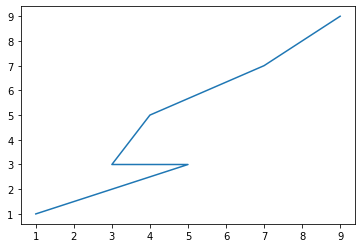

In [4]:
plt.plot([1, 5, 3, 4, 7, 9],[1, 3, 3, 5, 7, 9], label = "Random Graph")
plt.show()


* Using `plt.ylabel`, we can give names to the axes
* To make our plot look a little better, we use `plt.style.use()`. There's a variety of styles available [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
* The plot's title can be set with `plt.title()`
* To see our labels in the plot, we simply call `plt.legend`, the location can be specified using the loc argument
* If we want to show multiple graphs in one plot, we simply call `plt.plot()` again before calling `plt.show`.

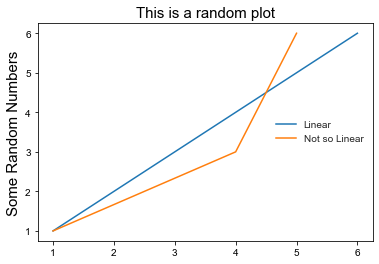

In [5]:
plt.plot([1, 3, 6],[1, 3, 6], label = "Linear")
plt.plot([1, 4, 5],[1, 3, 6], label = "Not so Linear")

plt.ylabel("Some Random Numbers", fontsize = 15)
plt.style.use("seaborn")
plt.title("This is a random plot", fontsize = 15)
plt.legend(loc = "center right", fontsize = 10)
plt.show()

After this short introduction, we wanet to start by importing and plotting the measured unemployment rates.

## Import the measured Unemployment Rates

The easiest way to handle our data is a [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Fortunately, Pandas as a useful function to read Excel files and create DataFrames out of them: [`pandas.read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

However, depending on the shape of the data, there can be difficulties when handling Excel files with pandas. In our case that includes:

1. Rows at the beginning of the spreadsheet that don't contain the data we're looking for and that we'd therefore like to skip when reading the Excel into a DataFrame.

2. The shape of the Excel file is not in the way that would be conventional for [pandas](https://pandas.pydata.org/pandas-docs/stable/). The index (the time period) is usually in the rows instead of the columns.

3. Eurostat records missing data with ":" and a separate sheet for flags, while NaN is the proper way to record missing observations. This means we'll have to set all the missing observations to *NaN*.

4. Some Country names, for example "Germany (until 1990 former territory of the FRG)" are in a format that makes it hard to use them in loops and other functionalities of python.

5. To work efficiently with `pandas` classes, it is important to use the right [indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html). In this case we are dealing with (a set of) [time series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html), so we want the index to have the proper functionality. In particular, our data refers to a full calendar year quarter which can be represented using a [period](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). This sort of information cannot be read from the Excel file as the reference to the quarters there is just a string.

At the beginning, let's load the first sheet containing the actual data into a `pandas.DataFrame`. In this case, the `pd.read_excel` function gets five inputs:

1. *aux_name*, the name and location of the file. We store it in a variable right away, that way the code is more readable and we can easily change it later

2. *skiprows*, the information to skip the first 11 rows, these are the rows that don't contain necessary information

3. *index_col*, which column to use as the DataFrame's index

4. *sheet_name*, which of the Excel's sheets to use, the default would be 0, the first sheet

```python
# We store the filename in a variable, that makes it easier to change it later
aux_name = myfolder + "lfsq_urgan.xls"
# Next, read the first Excel sheet
aux_data = pd.read_excel(aux_name, skiprows=11, index_col=0, sheet_name='Data')
aux_data
```

After creating the `Pandas.DataFrame` , we want to start cleaning the data. As mentioned, there are two ways in which Eurostat records missing data. The first is by setting the otherwise empty cells to ":". We can change those to NaN easily by using [`pandas.DataFrame.replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) and giving the function the inputs:

* ":" - what should be replaced

* "np.NaN" - the NaN functionality of Numpy that should be replaced with

It will continue to find all ":" in *aux_data* and replace them with NaN. Note that those are not just different strings but a method of numpy.

```python
aux_data = aux_data.replace(':', np.NaN)
```

After the first sheet, we now want to create a second `Pandas.DataFrame` for the *flags* sheet of our excel file. The second sheet has the same format and contains flags for bad data. We will use it to set all those cells in *aux_data* to `np.nan`.

Besides the inputs we used when reading the first sheet, here the function also gets the input:

* *nrows = aux_data.shape[0]*, nrows tells `read_excel` how many rows to parse and [`pandas.DataFrame.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) passes the number of rows of our DataFrame *aux_data* as an integer.

```python
aux_flags = pd.read_excel(aux_name, skiprows=11, index_col=0, nrows=aux_data.shape[0], sheet_name='Flags and Footnotes')
```

To prepare the DataFrames for later indexing, we have to transpose them. This is possible with the `DataFrame.T` function. What it does is basically to exchange columns and rows of the DataFrame.

```python
aux_data = aux_data.T
aux_flags = aux_flags.T
```

To find the cells in *aux_data* that correspond to flags in *aux_flags* and set them to NaN, we will use a function. This function will later:

1. Iterate over the cells of our DataFrame

2. Compare each cell of the *flags* sheet with the corresponding one in the *data* sheet

3. Set the cell to *NaN* if the *flags* sheet contains a string.


The iteration process works as follows:

* We pass our DataFrames using [pandas.DataFrame.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html). It converts the DataFrames into a Numpy Array object which can be handled by the enumerate function.

* Enumerate is extremely useful, it lets us iterate over someting (like a list) and automatically assign a counter to it


In our case that will be the row and column number (integers) of the values in the passed DataFrame.values. That also explains why we convert the DataFrames into Numpy arrays - we can't adress a cell in a DataFrame by calling `DataFrame[row_number, column_number]` but we can do the same with a Numpy array.

```python
# Our function get's two inputs, both of which will be sheets of an Excel file
def flags_to_NaN(data,flags):
    # Iterate over the array, return rows with their number
    for row, l in enumerate(flags):
        # Iterate over the row from the last line, return a single value with its column number
        for column, value in enumerate(l):
            # Check for strings
            if type(value) is str:
                data[row,column] = np.nan
    return data
```

Now we apply our function to the DataFrames we created in the previous steps. In detail, it does this:

1. `for row, l in enumerate(flags)`: This returns *row*, the row number and l, what the row contains (Something similar to: ['b' nan nan nan nan])

2. `for column, value in enumerate(l)`: This returns *column*, the location of the value in *l* ('b' would be 0) and value, the value itself ('b')

3. Then it checks if the value it has found is a string (The missing values are recorded with flags like 'b' or 'u'). If it is, it searches the exact same location in the array with the data (they have the same format so the rows and columns correspond) and sets it to np.nan

We save the cleaned DataFrame as *mydata*.

```python
aux_values = flags_to_NaN(aux_data.values, aux_flags.values)
mydata = pd.DataFrame(aux_values)
```

To make working with the final DataFrame easier, we'll now simplify the names of *Germany* and *Macedonia*. The ?`DataFrame.rename` method takes input in form of a dictionary containing:

1. The old column name as *Key*

2. The new column name it should be changed to as *Value*

```python
aux_data = aux_data.rename(columns = {'Former Yugoslav Republic of Macedonia, the':'Macedonia'})
aux_data = aux_data.rename(columns = {'Germany (until 1990 former territory of the FRG)':'Germany'})
```

Now, let's create a [`pd.period_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html) called "dates" which we will use as an index for our final DataFrame. This practical function gets three important inputs:

1. Start and end of the `pd.period_range`.
2. The frequency "Q". This way it knows only to create new datapoints quarterly, instead of monthly or weekly.
3. The name 'Quarterly Frequence'.
4. It returns a Period Index with a fixed frequency that we can use as index for our DataFrame.

```python
import pandas as pd
# Create the pd.period_range
dates = pd.period_range(start='2010Q2', end='2017Q4', freq='Q', name='Quarterly Frequence')
# Set mydata's index to be the Period "dates" we just created
mydata.index = dates
```

At last, some minor changes before we finish our DataFrame mydata:

1. Correct the column names. We can simply re-use the names of the colums of aux_data.
2. Drop the *Germany* column, the data in there is damaged and would cause trouble later.
3. Give the column-row a fitting name.

```python
# To set the names of the countries as column names, 
mydata.columns = aux_data.columns

# Drop Germany
mydata = mydata.drop(['Germany'], axis=1)

# Update the name of the columns list
mydata.columns.name = 'Countries'
```

1. Seasonally adjust the data.

To prevent the data being influenced by strong seasonal deviations, we will use a "moving average". We calculate it by using:

1. [`pandas.DataFrame.rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html), which works by always looking at 4 rows of the DataFrame. In our case, that equates to one year.

2. [`pandas.DataFrame.mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), which calculates the mean or average of what we pass it.

In combination, those two calculate the moving average.

```python
# Seasonally adjust data
mydata = mydata.rolling(4).mean()
mydata
```

Now we want to plot the Unemployment Rates of different countries against each other to see how they compare. We use some more functionalities of `Matplotlib` here.

* `figsize(width, height)`, this defines the size of the figure in inches.
* Set the limits of the axes. This simply makes the plot look more tidy because there's no excess space at the ends of the axes we don't need.

```python
# Modifies the defult size of plots [13.0,6.0] inches
matplotlib.rcParams['figure.figsize'] = [13.0,6.0]
#mydata['Germany'].plot(legend=True)
mydata['Sweden'].plot(legend=True) # Legend = True display the name of the country on the graph. 
mydata['Finland'].plot(legend=True)
mydata['Switzerland'].plot(legend=True)
mydata['Macedonia'].plot(legend=True)


plt.ylim(0,35)  # the y axis ranges from 0 to 35
plt.xlim("2011Q1","2017Q4")
plt.ylabel('Unemployment Rate (%)', size = 14) # Name x axis
plt.xlabel('Quaterly Frenquency', size = 14) # Name y axis
plt.title('Unemployment rate in Percent for different countries', weight = 'bold', size = 20)
plt.show()
```

# Transition Rates of the Labor Market